# Importing Required Libraries and Modules

In [64]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.callbacks import TensorBoard, ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [65]:
# dimensions of our images.
img_width, img_height = 150, 150

In [66]:
train_data_dir = 'Aug_Img_Dataset/training_set'
validation_data_dir = 'Aug_Img_Dataset/test_set'

In [67]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

In [68]:
# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical',
        shuffle=True)

Found 1200 images belonging to 3 classes.


In [69]:
validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

Found 120 images belonging to 3 classes.


In [70]:
from keras.utils.vis_utils import plot_model
import warnings
warnings.filterwarnings('ignore')

# Optimizer SGD+Momentum+Nesterov

In [71]:
from keras.optimizers import SGD
optimizer = SGD(lr=0.01, decay=1e-6, momentum=0.1, nesterov=True)

In [72]:
batch_size= 10
epochs = 20

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('softmax'))#sigmoid

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_31 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 32)       

In [73]:
import pydot
import graphviz


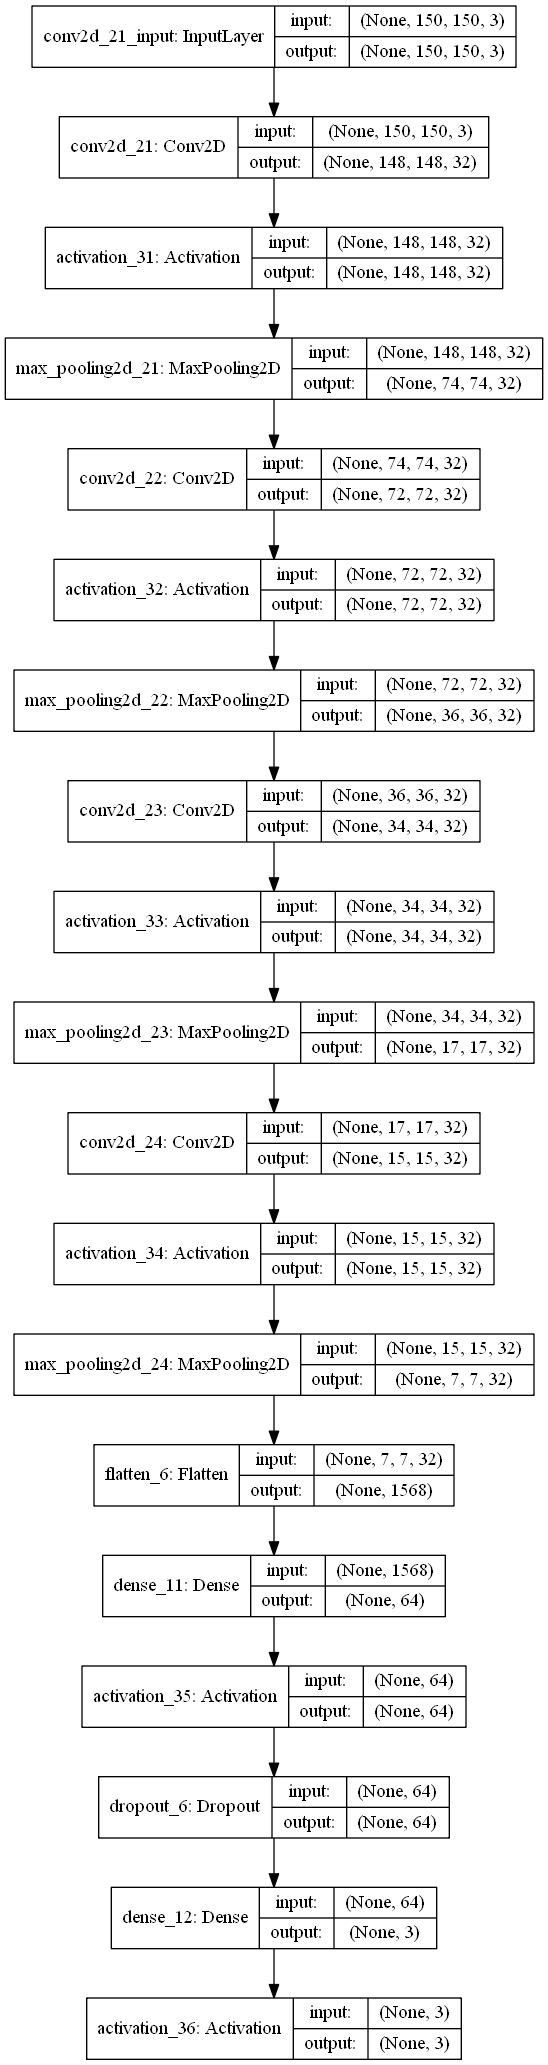

In [74]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [75]:
#model.summary()
nb_epoch = 20
nb_train_samples = 300
nb_validation_samples = 100

# Using Callbacks (Checkpoint,EarlyStopping and ReduceLROnPlateau)

In [76]:
tbCallBack=[]
tbCallBack=TensorBoard(log_dir='./Graph_SGD132')
tbCallBackchptk=ModelCheckpoint('models/checkpoints/weightsSGD2.h5',save_weights_only=True)
tbCallBackearlyStop=EarlyStopping(patience=3)
tbCallBackReduceLRonPlateau=ReduceLROnPlateau(monitor='loss',
                                   factor=0.1,
                                   cooldown=0,
                                   patience=5,
                                   min_lr=1e-4)
 

# Running and Saving the Model

In [77]:
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples, callbacks=[tbCallBack,tbCallBackchptk,tbCallBackearlyStop,tbCallBackReduceLRonPlateau])
model.save('models/model1amazonimagesSGD4MomentumNesterov.h5')
print(model.evaluate_generator(validation_generator, nb_validation_samples))

Epoch 1/20
18/18 [==============================] - 78s 4s/step - loss: 1.1000 - accuracy: 0.3333 - val_loss: 1.1123 - val_accuracy: 0.3333
Epoch 2/20
18/18 [==============================] - 79s 4s/step - loss: 1.0930 - accuracy: 0.4097 - val_loss: 1.1272 - val_accuracy: 0.3250
Epoch 3/20
18/18 [==============================] - 81s 4s/step - loss: 1.1038 - accuracy: 0.3160 - val_loss: 1.0925 - val_accuracy: 0.3417
Epoch 4/20
18/18 [==============================] - 81s 4s/step - loss: 1.0961 - accuracy: 0.3333 - val_loss: 1.0990 - val_accuracy: 0.4167
Epoch 5/20
18/18 [==============================] - 88s 5s/step - loss: 1.0970 - accuracy: 0.3542 - val_loss: 1.0889 - val_accuracy: 0.3667
Epoch 6/20
18/18 [==============================] - 79s 4s/step - loss: 1.0899 - accuracy: 0.3993 - val_loss: 1.0825 - val_accuracy: 0.4583
Epoch 7/20
18/18 [==============================] - 81s 5s/step - loss: 1.0929 - accuracy: 0.3924 - val_loss: 1.0850 - val_accuracy: 0.5250
Epoch 8/20
18/18 [==

# Adjusting Learning Rate from .01 to .001

In [84]:
optimizer = SGD(lr=0.001, decay=1e-6, momentum=0.1, nesterov=True)

In [85]:
batch_size= 10
epochs = 20

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation('softmax'))#sigmoid

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_43 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_44 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 34, 34, 32)       

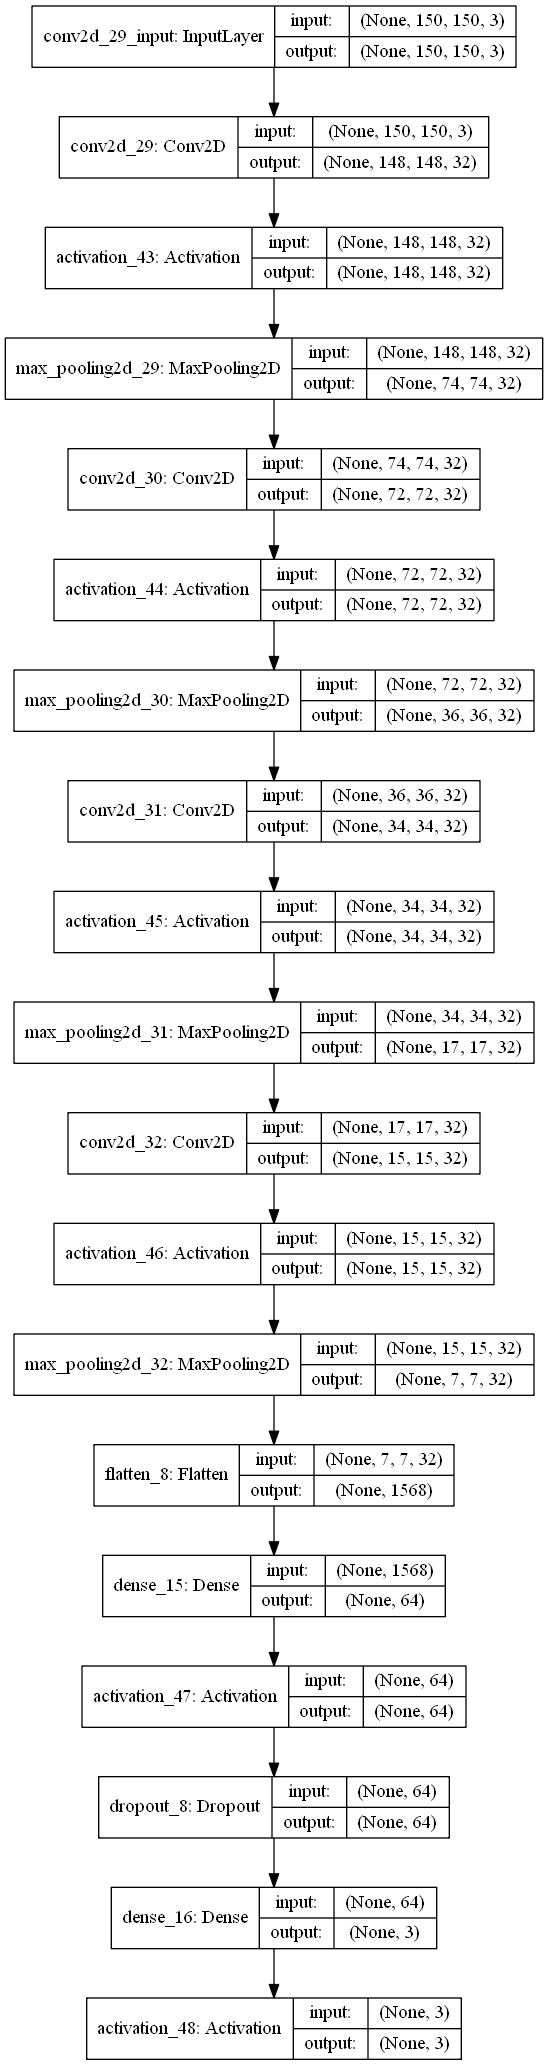

In [86]:
plot_model(model,show_shapes=True, show_layer_names=True)

In [87]:
#model.summary()
nb_epoch = 20
nb_train_samples = 300
nb_validation_samples = 100

In [88]:
tbCallBack=[]
tbCallBack=TensorBoard(log_dir='./Graph_SGD2')
tbCallBackchptk=ModelCheckpoint('models/checkpoints/weightSGD.h5',save_weights_only=True)
tbCallBackearlyStop=EarlyStopping(patience=3)
tbCallBackReduceLRonPlateau=ReduceLROnPlateau(monitor='loss',
                                   factor=0.1,
                                   cooldown=0,
                                   patience=3,
                                   min_lr=1e-4)

In [89]:
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples, callbacks=[tbCallBack,tbCallBackchptk,tbCallBackearlyStop,tbCallBackReduceLRonPlateau])
model.save('models/model1amazonimagesSGD2MomentumNesterov.h5')
print(model.evaluate_generator(validation_generator, nb_validation_samples))

Epoch 1/20
18/18 [==============================] - 91s 5s/step - loss: 1.1134 - accuracy: 0.3576 - val_loss: 1.0764 - val_accuracy: 0.3333
Epoch 2/20
18/18 [==============================] - 89s 5s/step - loss: 1.1113 - accuracy: 0.3090 - val_loss: 1.1080 - val_accuracy: 0.3333
Epoch 3/20
18/18 [==============================] - 88s 5s/step - loss: 1.0981 - accuracy: 0.3472 - val_loss: 1.0954 - val_accuracy: 0.3333
Epoch 4/20
18/18 [==============================] - 79s 4s/step - loss: 1.1054 - accuracy: 0.3333 - val_loss: 1.0993 - val_accuracy: 0.3333
[1.1092708110809326, 0.3333333432674408]
